# Classifying Abalone into young and old 

Rakesh Pandey, Master of Data Science, University of British Columbia

_**Abstract** Abalones have long been a valuable food source for people in all parts of the globe where the species thrives. The price of an abalone is positively associated with its age. However, assessing the age of an abalone is a tedious and time-consuming process. Cutting the shell through the cone, staining it, and counting the number of rings through a microscope is how abalone's age is determined. Having a machine learning model that classifies abalone age can greatly speed up this manual process, benefiting abalone researchers and adding value to the area. In this project we are classifying abalone snails into "young" and "old" according to their number of rings based on input features such as abalone's gender, height with meat in shell, weight of the shell etc. The dataset was collected form UCI Machine learning Repository. For this task, a logistic regression model has been proposed. The proposed model was trained and tested and the f1-score was obtained. The best F1 score was 0.90._

## 1. Introduction

Abalone are found all over the world. They are a unique kind of snail, classified in the class Gastropoda of the phylum Mollusca. Abalone are in the family Haliotidae and the genus Haliotis which refers to the flattened shape of the abalone shell.

Abalone are permanently attached to their shell in the center at a location called the muscle attachment. Some species leave a scar, whereas others don't. The shell is formed when the abalone is in the larval stage, and abalone can only add to an existing shell after this stage. They can survive being taken from their shell if they are not injured, but they cannot produce a new shell or reattach to their old shell if it has been removed. Abalone rely on their shells to protect themselves, so an animal without a shell would be easily eaten by a predator in the wild. Inside the shell, the location below the spiral is referred to as the apex just as it is on the outside of the shell. It is under a small, hard shelf at the end of the shell. A portion of the abalone body rests in the apex but there is no substantial attachment here. [[1]](http://www.marinebio.net/marinescience/06future/abintro.htm)

The abalone's shell is comprised of microscopic calcium carbonate tiles that are piled like bricks and is extremely strong.This tiled structure is being studied by material experts all over the world in order to get insight into stronger ceramic products like body armour. Grinding and cutting abalone shell produces hazardous dust; proper precautions must be taken to prevent humans from breathing these particles.[2]

Abalones have long been a valuable food source for people in all areas of the globe where the species thrives. In regions of Latin America, France, New Zealand, East Asia, and Southeast Asia, the meat of this mollusk is considered a delicacy. Abalone is known as bao yu in the Greater China region and among Overseas Chinese groups, and it is sometimes served as part of a Chinese feast.

Because of the value of abalone and its use, abalone is rather expensive. The price is positively associated with age. The high price is justified by the rarity of old abalone (number of rings > 11). Physical measurements have traditionally been used to estimate the age of abalone. Cutting the shell through the cone, staining it, and counting the number of rings through a microscope is how abalone's age is assessed — a tedious and time-consuming process. 

In this project we are classifying abalone snails into "young" and "old". Here, we aim to answer the following question with a Logistic Regression classification model: 

> Given the input features including sex, size and weight, is an abalone young or old?


## 2. Methodology

The Abalone data set that was used in this project was sourced from the UC
    Irvine Machine Learning Repository published in 1995. It can be
    found <a href="https://archive-beta.ics.uci.edu/ml/datasets/abalone" >here</a>. Each row in
    the data set represents the attributes and physical measurements of
    abalones including number of rings, sex, length, diameter, height, weight,
    etc. The number of rings were
    counted manually using a microscope by the researchers. The age of an abalone is represented by its number of
    rings plus 1.5 as number of years lived. 
    
This set of data was created in 1995. Despite the dataset's antiquity, the prediction models that may be created from it are likely still applicable in today's world. Any significant changes in the biological properties and features of animals take thousands to millions of years to occur. All animals, including abalone, are subject to Darwin's theory of evolution and natural selection. As a result, the biological characteristics of the abalone in this dataset are likely still applicable today, and useful predictive models can still be derived from it.

### 2.1 Input and target variables

There are 4177 examples in the dataset. Each case represents the features of the age of the abalone. 

|   # | Name           | Data Type   | Measurement Unit   | Attribute Type   | Description                              |
|----:|:---------------|:------------|:-------------------|:-----------------|:-----------------------------------------|
|   1 | Sex            | Categorical | nan                | Input            | M, F, and I (infant)                     |
|   2 | Length         | Continuous  | mm                 | Input            | Longest shell measurement                |
|   3 | Diameter       | Continuous  | mm                 | Input            | perpendicular to length                  |
|   4 | Height         | Continuous  | mm                 | Input            | with meat in shell                       |
|   5 | Whole weight   | Continuous  | mm                 | Input            | whole abalone                            |
|   6 | Shucked weight | Continuous  | mm                 | Input            | weight of meat                           |
|   7 | Viscera weight | Continuous  | mm                 | Input            | gut weight (after bleeding)              |
|   8 | Shell weight   | Continuous  | mm                 | Input            | after being dried                        |
|   9 | Rings          | integer     | nan                | -                | +1.5 gives the age in years              |
|  10 | Is old         | Categorical | nan                | Target           | Derived; Rings > 11 then old else young. |
     
Table 1: Input and Target description

For this project, we are separating the abalone into two classes, young and old, based on a threshold on the rings. Moreover, we are using a threshold whereby abalone that contain more than 11 rings would be placed in the old class and otherwise the abalone would be placed in the young class.

The original abalone data set was analysed as a three-category classification issue in David Clark, Zoltan Schreter, and Anthony Adams' research article "A Quantitative Comparison of Dystal and Backpropagation" presented at the Australian Conference on Neural Networks (ACNN'96) (grouping ring classes 1-8, 9 and 10, and 11 on).

### 2.2 Exploratory data analysis


**Imbalanced target variable**

After examining the distributions of young and old abalone in the training, it is palpable that there is a class imbalance in abalone age (Figure 1). In fact, in the training data, count of young abalone is over three times that of old abalone. Palpably, accuracy can not be used here as metric for model evaluation because of the class imbalance problem. As we are not preferring one class over other, our metric of interest would be f1 score. The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. We have also reported accuracy, precision, recall,  roc-auc, and average precision score for the model.


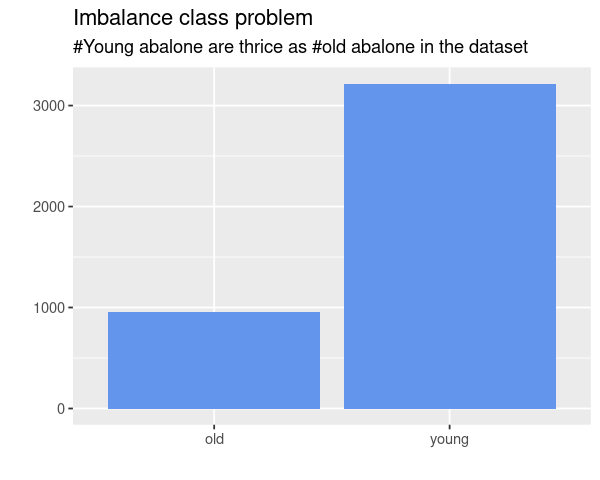

In [1]:
from IPython.display import Image
Image("img/imbalance_class.png", width=300, height=300)

Figure 1: Imbalance class (Young versus Old).

**Sex versus target**

Within the young and old classes, male and female abalone are distributed evenly, but there is a significant imbalance between young and old abalone in the infant group. (Figure 2).


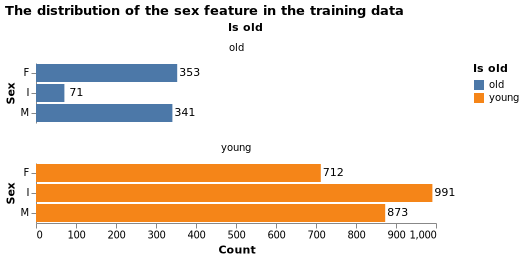

In [2]:
Image("../results/eda/sex_dist.png")

Figure 2: In the "Infant" group, there is an imbalance between young and old abalone.

As expected, there is no clear preference for one sex (Male or Female) based on whether the abalone is old or young. The higher number of Infant abalone in the young class, on the other hand, is cause for concern. Our intuition tells us that more Infant abalone should be classed as young, but the major problem with this dataset could be that we're predicting whether an abalone is young or old after knowing whether it's an Infant, which introduces redundancy in the predictive model. It's unclear why the researchers chose to add the Infant category in the sex feature column.

It's tough to know the significance of having an Infant category under the Sex feature without discussing with domain experts.

**Correlation matrix**

Further analysis suggests that features are highly correlated with each other and moderately correlated with rings, which is a proxy for the age of the abalone (Figure 3).

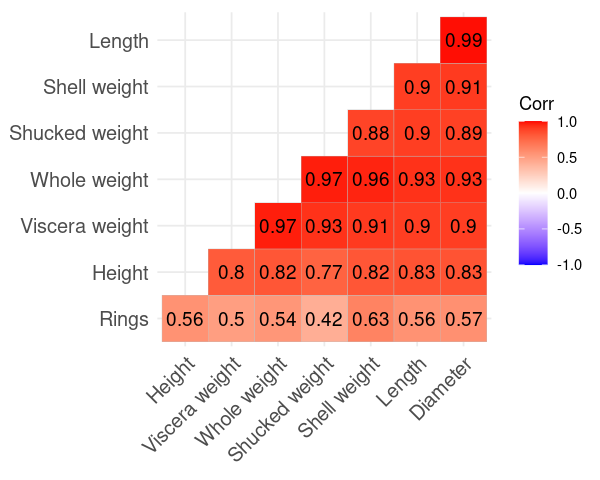

In [3]:
Image("img/correlation_plot.png", width=400, height=400)

Figure 3: Sorted lower triangle correlation matrix.

These correlation values provide some insight into the predictive model's decision-making process. Shell weight, for example, has a reasonably good association with Rings, suggesting that shell weight could be a relevant factor for estimating abalone age. This could suggest that older abalone require a heavier shell, whilst younger abalone may merely require a lighter shell. Our model might be able to detect these types of associations using these correlation values. Many of the explanatory variables are connected with one another, which is a trend worth noting. The diameter of an abalone, for example, is inversely proportional to its length. This is understandable, given that as an abalone's diameter increases, one should expect the abalone's length to increase as well. This does, however, have some implications for our model. It makes us wonder how important it is to include every single explanatory aspect in this model. Is it necessary to present both of these attributes if diameter encapsulates the information offered by length? Speaking with subject experts can assist us in determining which aspects are more important.

### 2.2 Data preprocessing

The dataset obtained was pretty clean and did not have any missing value. To model the numeric data correctly with logistic regression, we used a data preprocessing technique called "Data Scaling". The goal of data scaling is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.

Further, we converted the categorical attribute Sex to numeric values using "one-hot encoding" technique[[5]](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) then the numeric value was further scaled.

### 2.3 Data Scaling

In our project, we have used a specific technique called _Standardization_ to preprocess numeric features which standardize features by removing the mean and scaling to unit variance. The standard score of a sample x is calculated as:
$$z = (x - \mu) / s$$

where $\mu$ is the mean of the training examples  and s is the standard deviation of the training examples.

### 2.4 One-hot encoding

Categorical features are variables that contain label values rather than numeric values. In our case, sex is a categorical feature. Usually, machine learning algorithms do not operate on categorical features directly and data need to be transformed as numeric values. This is largely a constraint of effective implementation of machine learning algorithms, rather than rigid limitations on the techniques themselves.

One hot encoding is a process by which categorical variables are converted into numeric form that could be provided to machine learning algorithms. In our project, we have used `One-hot encoding` technique implemented by `scikit-learn`.



### 2.6 Selecting performance metric

We have a class imbalance issue in the dataset, which was identified during EDA. Because of the class imbalance problem, accuracy cannot be used as a metric for model evaluation. In case of imbalanced class distribution F1-score is a better metric than accuracy to evaluate our model on. The F1 score can be thought of as a harmonic mean of precision and recall, with the best value being 1 and the worst being 0. Along with the F1 score, accuracy, precision, recall, ROC AUC, and average precision score would also be reported.

### 2.5 Building the classification model

As we are dealing with a binary classification problem, we fit a logistic regression on the training data. Logistic regression is a classification algorithm that predicts a binary outcome based on a series of independent variables and can help predict the likelihood of events by looking at historical data points. 

In this project, we chose logistic regression over other algorithms such as tree-based techniques because of its interpretability.

The model set the target class old as 0 and young as 1. We first built a preprocessor which transformed the Sex category by using One-Hot-Encoding and we applied standard scaler on other numeric features. We then used a Grid Search cross validation to determine the best hyperparameter for the logistic regression. 

As we can see in Figure 4, as the value of C increases, the model's performance on validation sets increase and plateau at around $C = 10$. Note that the hyperparameter, C, of logistic regression is associated with the regularization strength (complexity penalty) of the model. Based on the tuning results, the best logistic regression model occurs when $C = 10$ (Figure 5).

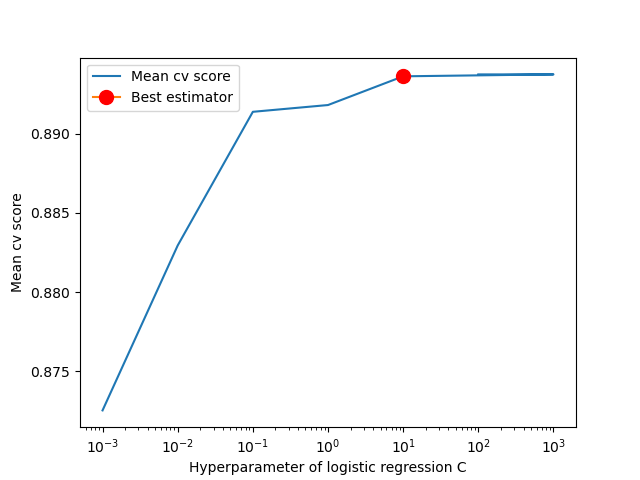

In [4]:
Image("../results/model/cv_result.png", width=400, height=400)

Figure 4. Hyperparameter tuning for C in logistic regression.

## 3. Results


The abalone dataset consists of 4177 samples with 9 attributes as in Table 1. We read the data as a pandas dataframe and divided the imported dataset into two sets randomly using train_test_split split function in pandas. The Training consists of approximately 80% (3342 samples) and the test set consists of 20% of the dataset (837 samples).

During model evaluation, we  noticed that the cross validation and test scores are in concordance with each other, indicating that the model is not overfitted.

### 3.1 Cross validation score

We started training the logistic regression model after ensuring that the parameter control was set correctly, and we kept an eye on the cross validation F1 score. We achieved mean cross validation F1 score of $0.894$ with hyperparameter $C = 10$.

|   rank_test_score |   mean_test_score |   param_logisticregression__C |   mean_fit_time |
|------------------:|------------------:|------------------------------:|----------------:|
|                 1 |             0.894 |                       100     |           0.039 |
|                 1 |             0.894 |                      1000     |           0.029 |
|                 3 |             0.894 |                        10     |           0.055 |
|                 4 |             0.892 |                         1     |           0.041 |
|                 5 |             0.891 |                         0.1   |           0.037 |
|                 6 |             0.883 |                         0.01  |           0.026 |
|                 7 |             0.873 |                         0.001 |           0.019 |

Table 2: Cross validation F1 score.

### 3.2 Test score

After fitting the model, we used a test set to assess how the model would perform on novel examples. The evaluation metrics on the test data set is shown (Table 2). Based on the model's performance on the test set, the F1 score is 0.9, where the F1 score is the harmonic mean of the model's recall score and precision score.

|    | Metrics           |   Test Result |
|---:|:------------------|--------------:|
|  0 | accuracy          |          0.84 |
|  1 | f1                |          0.9  |
|  2 | recall            |          0.95 |
|  3 | precision         |          0.86 |
|  4 | roc_auc           |          0.86 |
|  5 | average_precision |          0.95 |

Table 3: Test results.

### 3.3 Interpreting coefficients

To understand how the features in the dataset are influencing the model's predictions, we calculated the coefficients to demonstrate the importance of each feature in the model (Figure 6 and Table 3).

|                |   Coefficient |
|:---------------|--------------:|
| Shucked weight |          4.14 |
| Sex_I          |          0.98 |
| Viscera weight |          0.82 |
| Length         |          0.54 |
| Sex_F          |          0.13 |
| Sex_M          |          0.12 |
| Height         |         -0.25 |
| Diameter       |         -0.54 |
| Shell weight   |         -1.07 |
| Whole weight   |         -4.31 |

Table 4: Feature importance in our logistic model

Based on the coefficients, shucked weight influences the model the most towards predicting that an abalone is young, whereas whole_weight influences the model the most towards predicting that an abalone is old. 

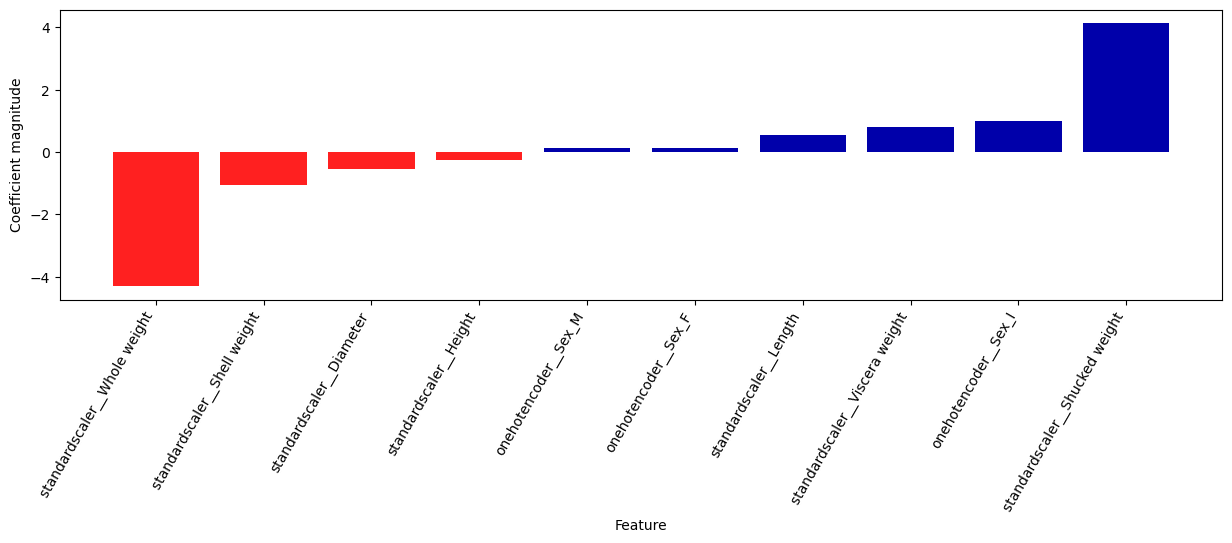

In [5]:
Image("../results/model/coeff_bar.png")

Figure 6: Model coefficents

It is fascinating to see that the total weight of an abalone and the shucked weight of an abalone have opposite effects on the prediction.

## 4. Conclusion

A binary logistic model for classifying abalone into young and old from physical measurements using data obtained from UCI Machine Learning Repository was presented. The variables for the model were obtained from dataset which represents abalone features. The logistic regression model performed well on new abalone cases, with F1 score of 0.90. This project showed that a properly trained logistic regression model is capable of estimating if an abalone is old or young from a set of physical measurements of abalone. The coefficients of the various physical measures were also obtained, which helped us understand how the features influenced the prediction. The model's predictions were heavily influenced by the weight features (shucked weight, whole weight, and shell weight).

## 5. Limitations and assumptions
We found that the input features are highly correlated and this might raise issue of multicollinearity. Since our primary objective was to classify abalone into young and old, we could not dive deep into this issue in the project.

We fit a logistic regression and tuned it by using grid search. Other modern algorithms like gradient boosting and deep neural network can be used. We chose logistic regression for its good interpretability and reasonable performance.

In terms of the sex feature, this project includes an infant category for abalone sex, which may be superfluous and may compromise the model's validity. We may explore deleting the Infant category or the sex feature completely in the future, after more investigation and consulting with domain experts, because being an infant automatically signals that the abalone is young, rendering the predictive model useless.

Throughout the project, the absence of domain knowledge to feature engineer the model inputs was a significant limitation

A lot of study has been done in this area. We have not, however, been able to explore any modern literature related to the task.

## References

1. http://www.marinebio.net/marinescience/06future/abintro.htm


2. Tryon, Jr., George W. (1880). Manual of Conchology; Structural and Systematic With Illustrations of the Species (PDF).II: Muricinæ, Purpurinæ. Philadelphia, PA: Academy of Natural Sciences.


3. "A Quantitative Comparison of Dystal and Backpropagation" presented to the Australian Conference on Neural Networks (ACNN'96) by David Clark, Zoltan Schreter, and Anthony Adams


4. https://docs.microsoft.com/en-us/previous-versions/azure/machine-learning/studio-module-reference/normalize-data#:~:text=Normalization%20is%20a%20technique%20often,of%20values%20or%20losing%20information.


5. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html